############ CUSTOMER CHURN PREDICCTION USING ML#########3

IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import pickle



DATA LOADING AND UNDERSTANDING

In [2]:
#LOAD DATASET
df=pd.read_csv(r"c:\projects\WA_Fn-UseC_-Telco-Customer-Churn.csv")
type(df)


pandas.core.frame.DataFrame

In [3]:
print(df.head(10))



   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL        

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df=df.drop(columns=["customerID"])


In [7]:
#covert into numerical datatype
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors='coerce')



In [8]:
#check missing values
df.isnull().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
#drop missing values
df=df.dropna(subset=["TotalCharges"])


In [10]:
cols_to_replace = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_to_replace:
    if col in df.columns:
        df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})



In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
binary_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'Churn', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
]

for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

df[binary_cols].head()


C:\Users\DELL\AppData\Local\Temp\ipykernel_7672\816102565.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,1,0,0,1,0,0,1,0,1,0,0,0,0
2,1,0,0,1,1,1,1,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,1,1,0,0,0
4,0,0,0,1,1,1,0,0,0,0,0,0,0


In [13]:
cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df[cols] = df[cols].replace({'No internet service': 'No', 'No phone service': 'No'})





C:\Users\DELL\AppData\Local\Temp\ipykernel_7672\4007297593.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette=['#4CAF50', '#FF6F61'])


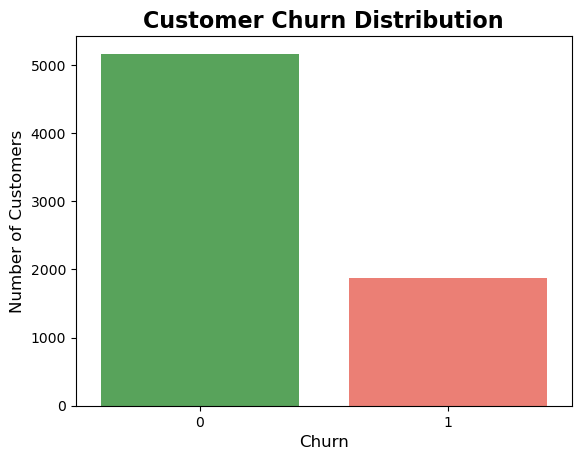

In [14]:

sns.countplot(x='Churn', data=df, palette=['#4CAF50', '#FF6F61'])
plt.title('Customer Churn Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_7672\2398158668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='Set3')


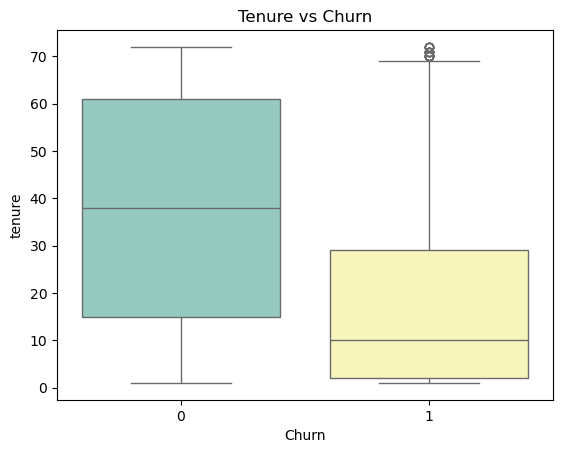

C:\Users\DELL\AppData\Local\Temp\ipykernel_7672\2398158668.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')


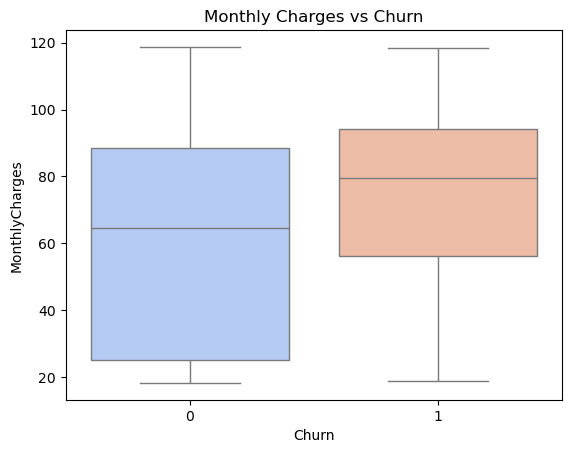

In [15]:
# Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set3')
plt.title('Tenure vs Churn')
plt.show()

# Monthly Charges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='coolwarm')
plt.title('Monthly Charges vs Churn')
plt.show()


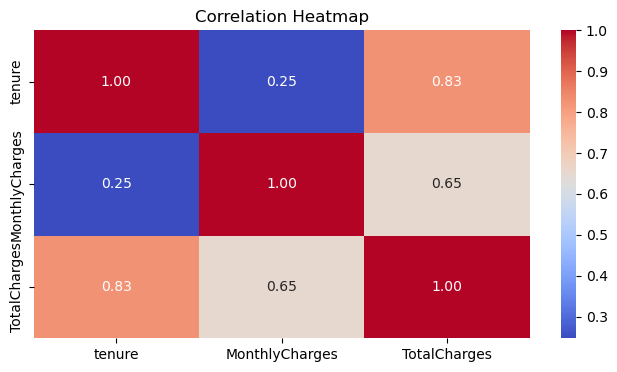

In [16]:
plt.figure(figsize=(8,4))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(), 
            annot=True, 
            cmap="coolwarm", 
            fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



feature engineering and Model training

In [17]:
#Separate features & target
X = df.drop('Churn', axis=1)
y = df['Churn']


In [18]:
#Handle categorical columns
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])
    

In [19]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#Scale numerical data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
#train modelmodels ={
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("-"*50)


Logistic Regression Accuracy: 0.7854
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

--------------------------------------------------
Decision Tree Accuracy: 0.7171
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1033
           1       0.47      0.51      0.49       374

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.65      1407
weighted avg       0.73      0.72      0.72      1407

--------------------------------------------------
Random Forest Accuracy: 0.7875
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48   

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.8049777777777777


In [23]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)


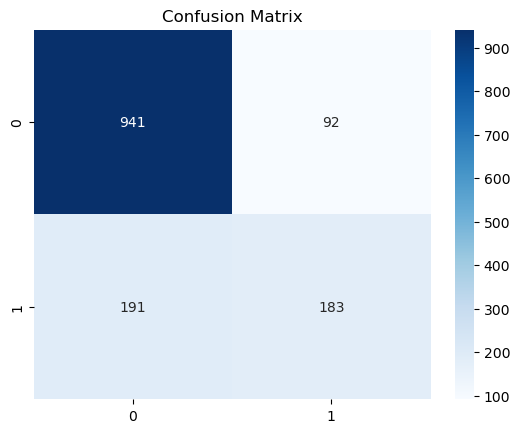

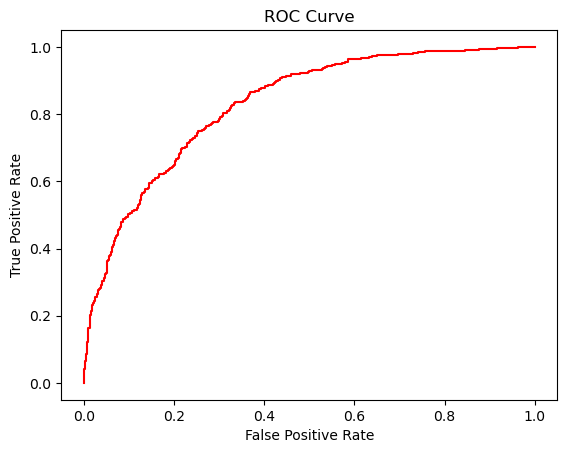

ROC-AUC Score: 0.828501690212299


In [24]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color='red')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print("ROC-AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))


C:\Users\DELL\AppData\Local\Temp\ipykernel_7672\1405355446.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance[indices][:10], y=features[indices][:10], palette='coolwarm')


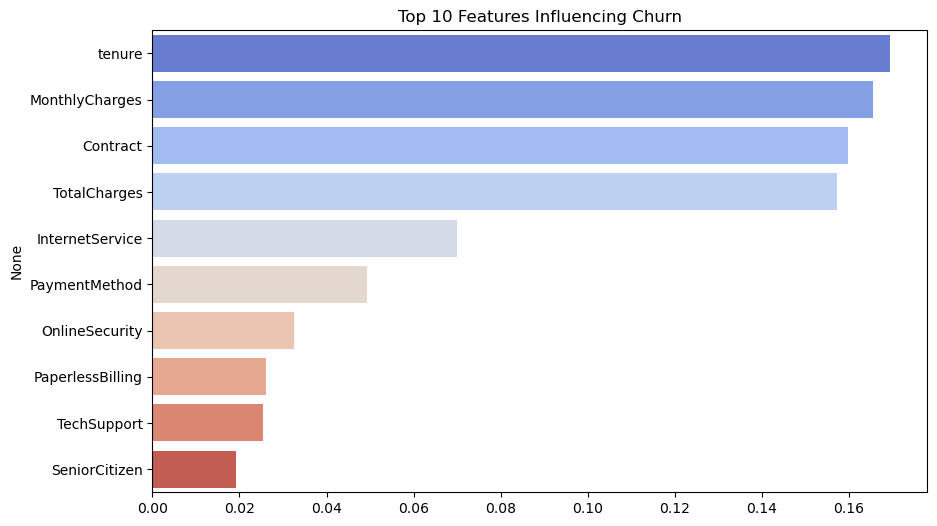

In [25]:
import numpy as np

importance = best_model.feature_importances_
indices = np.argsort(importance)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importance[indices][:10], y=features[indices][:10], palette='coolwarm')
plt.title('Top 10 Features Influencing Churn')
plt.show()


In [ ]:

import joblib

# Save the model
joblib.dump(grid.best_estimator_, 'churn_model.pkl')

joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']